In [1]:
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
import math
import copy as cp
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree
import isamcalc_lib as isam


In [ ]:
# Change of the permafrost area and extent

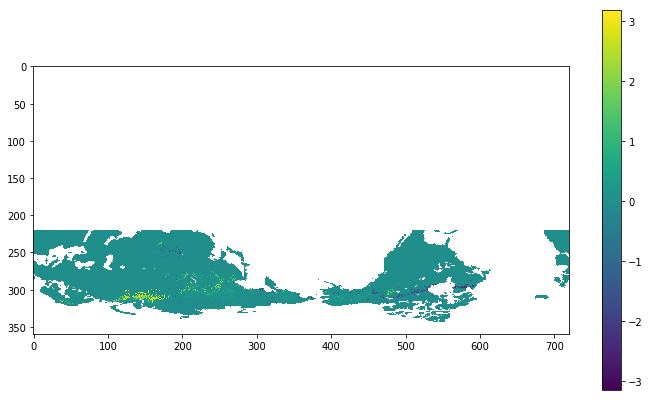

In [2]:
# Read in the ISAM estimated active layer thickness

# [NEED TO ADD 0D RESULTS AFTER FINISHING SIMULATIONS]

respath='/data/jain1/c/sshu3/SBGC/results/SBGC_regional/'
preind='1901_1910'
contemp='2001_2010'

# Historical
fp=respath+preind+'/mean_bgp2d_'+preind+'.nc'
nclu_preind=NetCDFFile(fp,'r')
ald_preind = nclu_preind.variables['ald_annual'][:]

# 20th century
fp=respath+contemp+'/mean_bgp2d_'+contemp+'.nc'
nclu_contemp=NetCDFFile(fp,'r')
ald_contemp = nclu_contemp.variables['ald_annual'][:]

ald_diff = ald_contemp - ald_preind

plt.figure(figsize=(12, 7))
plt.imshow(ald_diff)
plt.colorbar()

In [ ]:
15007140963152.752/1e12

In [3]:
# Check temperature vertical profile and see the permafrost extent 
# First 0D
respath='/data/jain1/c/sshu3/SBGC/results/SBGC_0d/'
prefix='Global_0DSBGC.bgp-monthly_3d_'
suffix='.nc'
month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
nlat = 360
nlon = 720

# Area of each grid (m2)
grid_area = np.zeros((nlat, nlon))
EARTH_AREA = 5.096e14
lat = np.arange(-89.75, 90.25, 0.5)
res = 0.5

for i in np.arange(0,nlon):
    for j in np.arange(0,nlat):
        grid_area[j,i] = (EARTH_AREA/2)*abs(np.sin((lat[j] - res/2)*math.pi/180) -
                np.sin((lat[j] + res/2)*math.pi/180))/(360/res)

pfmask_old = np.zeros((360,720))
pfmask = np.zeros((360,720))
pfmask_mon = np.zeros((12,360,720))
pfmask_real = np.zeros((360,720))
pfarea_ts_0d=np.zeros(114)
pfmap_0d = np.zeros((114,360,720))

# Read the 3D files
# Loop over the whole 115 years
# According to the definition, the soil temperature shall be below 0C for at elast 2 consecutive year
# 1901
for i in np.arange(0,12):
    fp=respath+prefix+'1901_'+month[i]+'.nc'
    nclu=NetCDFFile(fp,'r')
    tss = nclu.variables['c_tss'][:]
    latnc = nclu.variables['lat'][:]
    lonnc = nclu.variables['lon'][:]
    pfmask_old = 0.

    for j in np.arange(5,15):
        cur_layer_tss = cp.deepcopy(tss[j,:,:])
        cur_layer_tss[cur_layer_tss<273.16] = 1.
        cur_layer_tss[cur_layer_tss>=273.16] = 0.
        cur_layer_tss[tss[j,:,:]<0.] = 0.
        pfmask_old = pfmask_old + cur_layer_tss
    pfmask_old[pfmask_old>0] = 1.
    pfmask_mon[i,:,:] = pfmask_old

pfmask_old = np.sum(pfmask_mon, axis=0)
pfmask_old[pfmask_old<12] = 0.
pfmask_old[pfmask_old>=12] = 1. 

# 1902 - 2015
for y in np.arange(1902,2016):
        
    for i in np.arange(0,12):
        fp=respath+prefix+str(y)+'_'+month[i]+'.nc'
        nclu=NetCDFFile(fp,'r')
        tss = nclu.variables['c_tss'][:]
        latnc = nclu.variables['lat'][:]
        lonnc = nclu.variables['lon'][:]
        pfmask = 0.
        
        for j in np.arange(5,15):
            cur_layer_tss = cp.deepcopy(tss[j,:,:])
            cur_layer_tss[cur_layer_tss<273.16] = 1. 
            cur_layer_tss[cur_layer_tss>=273.16] = 0.
            cur_layer_tss[tss[j,:,:]<0.] = 0.
            pfmask = pfmask + cur_layer_tss
        pfmask[pfmask>0] = 1.
        pfmask_mon[i,:,:] = pfmask
        
    pfmask = np.sum(pfmask_mon, axis=0)
    pfmask[pfmask<12] = 0.
    pfmask[pfmask>=12] = 1. 
        
    pfmask_real= (pfmask+pfmask_old)/2.
    pfmask_real[pfmask_real>=1] = 1.
    pfmask_real[pfmask_real<1] = 0.
    pfmap_0d[(y-1902),:,:] = pfmask_real
    pfmask_old = pfmask
    pfarea = pfmask_real*grid_area
    tot_pfarea = np.nansum(pfarea)
    pfarea_ts_0d[(y-1902)] = tot_pfarea

    print('The global permafrost area ...')
    print('Year:  '+str(y))
    print(tot_pfarea)
    


The global permafrost area ...
Year:  1902
15055100603027.982
The global permafrost area ...
Year:  1903
15086643703881.672
The global permafrost area ...
Year:  1904
15097991289780.402
The global permafrost area ...
Year:  1905
15127882856674.803
The global permafrost area ...
Year:  1906
14876510343621.783
The global permafrost area ...
Year:  1907
14831130533815.03
The global permafrost area ...
Year:  1908
14834466172983.262
The global permafrost area ...
Year:  1909
14853630066112.469
The global permafrost area ...
Year:  1910
14933084608819.068
The global permafrost area ...
Year:  1911
14976695582158.9
The global permafrost area ...
Year:  1912
15079443736924.15
The global permafrost area ...
Year:  1913
15151387853342.248
The global permafrost area ...
Year:  1914
15168785981836.547
The global permafrost area ...
Year:  1915
15047624241812.799
The global permafrost area ...
Year:  1916
15119240450600.531
The global permafrost area ...
Year:  1917
15119343608093.756
The global p

In [4]:
# Second 1D
respath='/data/jain1/c/sshu3/SBGC/results/SBGC_regional/'
prefix='Global_1DSBGC.bgp-monthly_3d_'
suffix='.nc'
month=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
nlat = 360
nlon = 720

# Area of each grid (m2)
grid_area = np.zeros((nlat, nlon))
EARTH_AREA = 5.096e14
lat = np.arange(-89.75, 90.25, 0.5)
res = 0.5

for i in np.arange(0,nlon):
    for j in np.arange(0,nlat):
        grid_area[j,i] = (EARTH_AREA/2)*abs(np.sin((lat[j] - res/2)*math.pi/180) -
                np.sin((lat[j] + res/2)*math.pi/180))/(360/res)

pfmask_old = np.zeros((360,720))
pfmask = np.zeros((360,720))
pfmask_mon = np.zeros((12,360,720))
pfmask_real = np.zeros((360,720))
pfarea_ts_1d=np.zeros(114)
pfmap_1d = np.zeros((114,360,720))

# Read the 3D files
# Loop over the whole 115 years
# According to the definition, the soil temperature shall be below 0C for at elast 2 consecutive year
# 1901
for i in np.arange(0,12):
    fp=respath+prefix+'1901_'+month[i]+'.nc'
    nclu=NetCDFFile(fp,'r')
    tss = nclu.variables['c_tss'][:]
    latnc = nclu.variables['lat'][:]
    lonnc = nclu.variables['lon'][:]
    pfmask_old = 0.

    for j in np.arange(5,15):
        cur_layer_tss = cp.deepcopy(tss[j,:,:])
        cur_layer_tss[cur_layer_tss<273.16] = 1.
        cur_layer_tss[cur_layer_tss>=273.16] = 0.
        cur_layer_tss[tss[j,:,:]<0.] = 0.
        pfmask_old = pfmask_old + cur_layer_tss
    pfmask_old[pfmask_old>0] = 1.
    pfmask_mon[i,:,:] = pfmask_old

pfmask_old = np.sum(pfmask_mon, axis=0)
pfmask_old[pfmask_old<12] = 0.
pfmask_old[pfmask_old>=12] = 1. 

# 1902 - 2015
for y in np.arange(1902,2016):
        
    for i in np.arange(0,12):
        fp=respath+prefix+str(y)+'_'+month[i]+'.nc'
        nclu=NetCDFFile(fp,'r')
        tss = nclu.variables['c_tss'][:]
        latnc = nclu.variables['lat'][:]
        lonnc = nclu.variables['lon'][:]
        pfmask = 0.
        
        for j in np.arange(5,15):
            cur_layer_tss = cp.deepcopy(tss[j,:,:])
            cur_layer_tss[cur_layer_tss<273.16] = 1. 
            cur_layer_tss[cur_layer_tss>=273.16] = 0.
            cur_layer_tss[tss[j,:,:]<0.] = 0.
            pfmask = pfmask + cur_layer_tss
        pfmask[pfmask>0] = 1.
        pfmask_mon[i,:,:] = pfmask
        
    pfmask = np.sum(pfmask_mon, axis=0)
    pfmask[pfmask<12] = 0.
    pfmask[pfmask>=12] = 1. 
        
    pfmask_real= (pfmask+pfmask_old)/2.
    pfmask_real[pfmask_real>=1] = 1.
    pfmask_real[pfmask_real<1] = 0.
    # Mask the alpine permafrost (Any area below 40N)
    pfmask_real[0:260,:] = 0.
    pfmap_1d[(y-1902),:,:] = pfmask_real
    pfmask_old = pfmask
    pfarea = pfmask_real*grid_area
    tot_pfarea = np.nansum(pfarea)
    pfarea_ts_1d[(y-1902)] = tot_pfarea

    print('The global permafrost area ...')
    print('Year:  '+str(y))
    print(tot_pfarea)



The global permafrost area ...
Year:  1902
13665361686610.072
The global permafrost area ...
Year:  1903
13704474792821.697
The global permafrost area ...
Year:  1904
13720511828830.834
The global permafrost area ...
Year:  1905
13717108741689.838
The global permafrost area ...
Year:  1906
13505114064026.826
The global permafrost area ...
Year:  1907
13464951884181.002
The global permafrost area ...
Year:  1908
13485806518497.727
The global permafrost area ...
Year:  1909
13493397440688.672
The global permafrost area ...
Year:  1910
13545642714267.223
The global permafrost area ...
Year:  1911
13586615689266.371
The global permafrost area ...
Year:  1912
13678848846804.29
The global permafrost area ...
Year:  1913
13750449431982.94
The global permafrost area ...
Year:  1914
13770181406567.613
The global permafrost area ...
Year:  1915
13650692152682.863
The global permafrost area ...
Year:  1916
13722767454764.252
The global permafrost area ...
Year:  1917
13745560801607.7
The global p

In [7]:
(13685618549475.625-12935718579003.463)/1e12

0.7498999704721621

In [ ]:
import copy
temp=copy.deepcopy(pfmask_real[:,0:360])
pfmask_real[:,0:360] = pfmask_real[:,360:720]
pfmask_real[:,360:720] = temp

In [ ]:
# Mask the alpine permafrost (Any area below 40N)
ttt = copy.deepcopy(pfmap_1d)
ttt[:,0:260,:] = 0

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(pfmap_0d[110,::-1,:])
#plt.savefig('pmf0d.png')

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(pfmap_1d[110,::-1,:])
#plt.savefig('pmf1d.png')

In [ ]:
plt.imshow(pfmap_1d[110,:,:])

In [ ]:
plt.imshow(ald_diff)

In [ ]:
# Make plot for the decrease of permafrost extent 
fig = plt.figure(figsize=(16,8))
font = {'family' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 

ax1 = fig.add_subplot(gs[0])#, figsize=(10,8))
yr = np.arange(1902,2016)
ax1.plot(yr, pfarea_ts_1d/1e12)
plt.xlabel('Year')
plt.ylabel('Area ($Mkm^2$)')
plt.annotate('(a)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=24)
#text1 = ax1.text(1903, 11.48, '(a)', fontsize=24)

ax2 = fig.add_subplot(gs[1])#, figsize=(10,8))
#ax1.set_title("ISAM-1D SOC stock (1m)",fontsize=32)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
cs1 = map.pcolormesh(x,y,ald_diff[:,:],
              norm=colors.Normalize(vmin=-0.6,vmax=0.6),cmap=plt.cm.jet)
cbar = map.colorbar(cs1,location='bottom',pad="5%",extend='both')
cbar.set_label('Change of active layer depth (m)')

map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
#plt.title('Permafrost SOC stock')
cbar.ax.tick_params(labelsize=18) 
plt.annotate('(b)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=24)

plt.show()
#plt.savefig('FigS3.png')

In [ ]:
# First calculate the mean of 1902 - 1910
pfmap_1900s = np.mean(pfmap_0d[0:9,:,:], axis=0)
pfmap_1900s[pfmap_1900s>=0.5] = 1.
pfmap_1900s[pfmap_1900s<0.5] = 0.
# Second calculate the mean of 2001 - 2010
pfmap_2000s = np.mean(pfmap_0d[99:109,:,:], axis=0)
pfmap_2000s[pfmap_2000s>=0.5] = 1.
pfmap_2000s[pfmap_2000s<0.5] = 0.
# Diff map
pfmap_diff = pfmap_2000s - pfmap_1900s
pfmap_diff[pfmap_diff>=0.] = np.float('nan')
# Diff of permafrost area
#plt.figure(figsize=(12, 7))
#plt.imshow(pfmap_diff)
#plt.colorbar()

# Get a mask from diff map
pfmap_diff_mask = np.zeros((360,720))
pfmap_diff_mask[~np.isnan(pfmap_diff)] = 1.
pfmap_diff_mask[np.isnan(pfmap_diff)] = 0.

#plt.figure(figsize=(12, 7))
#plt.imshow(pfmap_diff_mask)
#plt.colorbar()

In [ ]:
# The total SOC involved in the change of permafrost
# We assume the whole column of SOC was exposed
# But the newly exposed SOC shall be the amount subtract the already exposed amount
# So we still need the active later thickness to be calculated.

# Check which soil layer ALD falling in for 1900s
ald_layer = np.zeros((360,720))
z, dz, zsoih = isam.get_isam_soildp(10)

for i in np.arange(0,nlon):
    for j in np.arange(0,nlat):
        if(int(pfmap_1900s[j,i]) == 1 or int(pfmap_2000s[j,i]) == 1):
            for k in np.arange(0,10):
                if(ald_preind[j,i] > zsoih[k] and ald_preind[j,i] <= zsoih[k+1]):
                    ald_layer[j,i] = k+1

# Check which soil layer ALD falling in for 2000s
ald_layer_2000s = np.zeros((360,720))
for i in np.arange(0,nlon):
    for j in np.arange(0,nlat):
        if(int(pfmap_1900s[j,i]) == 1 or int(pfmap_2000s[j,i]) == 1):
            for k in np.arange(0,10):
                if(ald_contemp[j,i] > zsoih[k] and ald_contemp[j,i] <= zsoih[k+1]):
                    ald_layer_2000s[j,i] = k+1

#plt.figure(figsize=(12, 7))
#plt.imshow(ald_layer)
#plt.colorbar()

# Get the preind SOC stock data
# Read the 3D files, For ISAM-1D
# Historical
fp=respath+preind+'/mean_bgc3d_'+preind+'.nc'
nclu_preind=NetCDFFile(fp,'r')
soclev_preind = nclu_preind.variables['soil_c_lev'][:]
resplev_preind = nclu_preind.variables['resp_lev'][:]
latnc = nclu_preind.variables['lat'][:]
lonnc = nclu_preind.variables['lon'][:]
#lonnc = ((lonnc - 180) % 360) - 180

# 20th century
fp=respath+contemp+'/mean_bgc3d_'+contemp+'.nc'
nclu_contemp=NetCDFFile(fp,'r')
soclev_contemp = nclu_contemp.variables['soil_c_lev'][:]
resplev_contemp = nclu_contemp.variables['resp_lev'][:]

soc_exposed = np.zeros((360,720))
# Calculate the newly exposed SOC!
for i in np.arange(0,nlon):
    for j in np.arange(0,nlat):
        if(int(pfmap_diff_mask[j,i]) == 1):
            if(int(ald_layer[j,i]) == 10):
                soc_exposed[j,i] = soclev_preind[9,j,i]
            else:
                ind = int(ald_layer[j,i])
                #print(int(ald_layer[j,i]))
                soc_exposed[j,i] = np.sum(soclev_preind[ind:10,j,i])
                #print(soclev_preind[ind:10,j,i])

# Calculate the exposed SOC due to permafrost degradation
soc_degrade = np.zeros((360,720))
for i in np.arange(0,nlon):
    for j in np.arange(0,nlat):
        if(int(pfmap_2000s[j,i]) == 1):
            #print(int(ald_layer_2000s[j,i]))
            if(ald_layer_2000s[j,i] > ald_layer[j,i]):
                ind_l = int(ald_layer[j,i])
                ind_u = int(ald_layer_2000s[j,i])
                soc_degrade[j,i] = np.sum(soclev_preind[ind_l:ind_u,j,i])
                    
#plt.figure(figsize=(12, 7))
#plt.imshow(soc_exposed)
#plt.colorbar()

# Total exposed SOC amount plus degraded SOC
tot_soc_exposed_amount = soc_exposed*grid_area
tot_soc_exposed = np.nansum(tot_soc_exposed_amount)/1e12
tot_soc_degrade_amount = soc_degrade*grid_area
tot_soc_degrade = np.nansum(tot_soc_degrade_amount)/1e12
tot_soc_pfloss = tot_soc_exposed + tot_soc_degrade


In [ ]:
plt.imshow(soc_degrade)
plt.colorbar()

In [ ]:
soclev_preind[:,304,212]

In [ ]:
tot_soc_degrade

In [ ]:
tot_soc_pfloss

In [ ]:
# Difference of the map of permafrost extent between 2000s and 1900s
pfloss = (np.mean(pfarea_ts_0d[0:9]) - np.mean(pfarea_ts_0d[99:109]))/1e12

In [ ]:
pfloss

In [ ]:
# Reduction of the permafrost area
plt.plot(pfarea_ts_1d)
plt.plot(pfarea_ts_0d)

In [ ]:
# Check the air temperature to validate the permafrost degradation

respath='/data/jain1/c/sshu3/SBGC/results/SBGC_regional/'
prefix='Global_1DSBGC.bgp-yearly_2d_'

mean_airt_1d=np.zeros(115)
for y in np.arange(1901,2016):
    fp=respath+prefix+str(y)+'.nc'
    nclu=NetCDFFile(fp,'r')
    airt=nclu.variables['tavg_avg_yr'][:]
    mean_airt = np.nanmean(airt)
    mean_airt_1d[(y-1901)] = mean_airt


In [ ]:
plt.plot(mean_airt_1d)

In [ ]:
np.arange(1901,1911)

In [ ]:
# Make plot to show the permafrost extent

# Plot the figure1
# Comparison of 1m SOC stock between two models and to the NCSCD data
fig = plt.figure(figsize=(30,36))

ax1 = fig.add_subplot(121)
#ax1.set_title("ISAM-1D SOC stock (1m)",fontsize=32)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
lon,lat = np.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
xs, ys = np.meshgrid(lonnc3, latnc3)
clevs = np.power(10.0, np.arange(-1.0,2.5,0.5))
cs1 = map.pcolormesh(x,y,soc_contemp[:,:],
              norm=colors.Normalize(vmin=0,vmax=30.),cmap=plt.cm.YlOrBr) # use log color scale,
# Overlap scatter plot to show the peatland distribution
map.scatter(xs, ys, s = 0.4*wtld, latlon=True, marker='_', color='cyan')
cbar = map.colorbar(cs1,location='bottom',pad="5%",extend='both')
#parallels = np.arange(45.,80.,15.)
## labels = [left,right,top,bottom]
#map.drawparallels(parallels)#,labels=[False,True,True,False])
#meridians = np.arange(15.,346.,30.)
#map.drawmeridians(meridians)#,labels=[True,False,False,True])

map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
#plt.title('Permafrost SOC stock')
cbar.ax.tick_params(labelsize=30) 

ax2 = fig.add_subplot(122)
ax2.set_title("ISAM-0D SOC stock (1m)",fontsize=32)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs = map.pcolormesh(x,y,soc0d_contemp[:,:],
              norm=colors.Normalize(vmin=0.,vmax=30.),cmap=plt.cm.YlOrBr) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
map.scatter(xs, ys, s = 0.4*wtld, latlon=True, marker='_', color='cyan')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=30) 

lon2,lat2 = np.meshgrid(lonnc2,latnc2) #Returns coordinate matrices from coordinate vectors
x2,y2 = map(lon2,lat2)
ax2 = fig.add_subplot(333)
ax2.set_title("NCSCD SOC stock (1m)",fontsize=32)
map = Basemap(projection='npstere',boundinglat=45,lon_0=0,resolution='l')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
cs = map.pcolormesh(x2,y2,soc_ncscd[:,:],
              norm=colors.Normalize(vmin=0.,vmax=30.),cmap=plt.cm.YlOrBr) # use log color scale,
                                                     # omit this to use linear
                                                     # color scale
map.scatter(xs, ys, s = 0.4*wtld, latlon=True, marker='_', color='cyan')
map.drawparallels(np.arange(-80.,81.,20.))#, labels=[True,True,True,True])
map.drawmeridians(np.arange(-180.,181.,20.))#, labels=[True,True,True,True])
cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=30) 

plt.show()
#plt.savefig('./figures/fig6.png',dpi=300)